In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

#### Challenge: Model Comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

#### Description of ‘A-level-geography’

The data contain the result of examination on A-level geometry for 33,276 students from over 2,000 institutions in England in 1997. There are 15 fields in the data set of ASCII format, and each field is separated by a blank space. The detailed description of the fields is as followings


| Variable  | Coding | Description |
| --------- | ------ | ----------- |
| SCORE   |   0, 2, 4, 6, 8, 10   | 0=fail, 2=grade E, 4=grade D, 6=grade C, 8=grade B, 10=grade A | 
| BOARD  | 1 – 7  | 1=Associate and WJB, 2=Cambridge, 3=London, 5=Oxforld, 6=Joint Matriculation, 7=Oxford-Cambridge |
| GCSE-G-SCORE | 0,2,3,4,5,6,7,8 | 0=fail, 2=grade F,  3=grade E, 4=grade D, 5=grade C, 6=grade B, 7=grade A, 8=grade A* | 
| GENDER | 0 or 1 | 0=Male, 1=Female | 			
| GTOT | 19 ~ 95 continuous | 	Total point score of all GCSE subjects
| GNUM | 4 ~13 continuous | 	Total number of GCSE taken 
| GCSE-MA-MAX | 0 – 8  | Maximum point score for GCSE math: 0=fail, 2=grade F,  3=grade E, 4=grade D, 5=grade C, 6=grade B, 7=grade A, 8=grade A* | 
| GCSE-math-n | 	1,2,3,4 | 	Total number of GCSE math subjects taken | 
| AGE | 	continuous | 	Age of student in month, centred at 222 months ( 18.5 years) | 
| INST-GA-MN | 	continuous | 	Institution average of GCSE score, centred at its mean | 
| INST-GA-SD | 	continuous | 	Institution standard deviation of GCSE score | 
| INSTTYPE	Category | 1 ~ 11 |1 = LEA Maintained Comprehensive, 2 = Maintained Selective, 3 = Maintained Modern, 4 = Grammar Comprehensive, 5 = Grammar Selective, 6 = Grammar Modern, 7 = Independent selective, 8 = Independent non-selective, 9 = Sixth Form College, 10 = Further Education College, 11 = Others | 
| LEA | 	1 ~ 131 | 	Local Education Authority identification | 
| INSTITUTE | 	1 ~ 98 | 	Institution identification within LEA | 
| STUDENT | 	25 ~ 196053 | 	Student identification | 

In [77]:
df1 = pd.read_csv('data/geography.txt', sep=' ', header=None) 
df1.columns = ['a_scre','boards', 'g_ge_s', 'gender', 'g_tl_s', 'g_tl_n','g_m_mx', 'g_m_tl','age_mh',
              'i_g_mn', 'i_g_sd','i_type', 'lea_id', 'ise_id', 'studnt']
df1.tail()

,a_scre,boards,g_ge_s,gender,g_tl_s,g_tl_n,g_m_mx,g_m_tl,age_mh,i_g_mn,i_g_sd,i_type,lea_id,ise_id,studnt
33271,8.0,3,7,1,71,11.0,7,1,-3.0,-0.06,0.65,9.0,131.0,33.0,196035.0
33272,6.0,3,6,0,52,9.0,6,1,1.0,-0.06,0.65,9.0,131.0,33.0,196037.0
33273,4.0,3,5,1,46,9.0,5,1,-3.0,-0.06,0.65,9.0,131.0,33.0,196039.0
33274,8.0,3,5,1,52,9.0,5,1,5.0,-0.06,0.65,9.0,131.0,33.0,196047.0
33275,6.0,3,6,1,48,9.0,5,1,-3.0,-0.06,0.65,9.0,131.0,33.0,196053.0


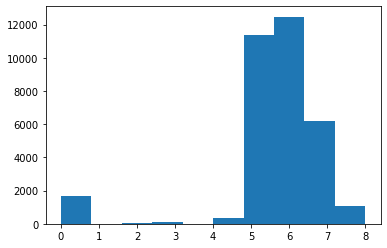

In [78]:
plt.hist(df1.g_m_mx)
plt.show()

In [79]:
df1.tail()

,a_scre,boards,g_ge_s,gender,g_tl_s,g_tl_n,g_m_mx,g_m_tl,age_mh,i_g_mn,i_g_sd,i_type,lea_id,ise_id,studnt
33271,8.0,3,7,1,71,11.0,7,1,-3.0,-0.06,0.65,9.0,131.0,33.0,196035.0
33272,6.0,3,6,0,52,9.0,6,1,1.0,-0.06,0.65,9.0,131.0,33.0,196037.0
33273,4.0,3,5,1,46,9.0,5,1,-3.0,-0.06,0.65,9.0,131.0,33.0,196039.0
33274,8.0,3,5,1,52,9.0,5,1,5.0,-0.06,0.65,9.0,131.0,33.0,196047.0
33275,6.0,3,6,1,48,9.0,5,1,-3.0,-0.06,0.65,9.0,131.0,33.0,196053.0


In [80]:
a = ['boards', 'ise_id', 'i_type', 'g_m_tl']                                # rank feature based upon target 
b = ['boards', 'ise_id', 'i_type', 'g_ge_s', 'g_m_mx', 'age_mh', 'g_m_tl']  # linear scale features -2 to 2
c = ['g_avg_']                                                              # standardize feature with z score

ab = list(set(a) & set(b))
b  = list(set(b) - set(ab)) 

groups = ['ab', 'b', 'c']

In [81]:
# ordinal rank based upon target mean
def ordinal_by_target(df, tgt, fte):
    rnk  = df.groupby(fte)[tgt].mean().sort_values(ascending=True).index
    return {rnk[i]:i for i in range(len(rnk))}

# functions to clean or tranform columns
# transform using dictionary
def A(srs, arg): 
    assert len(arg) == 1
    return srs.apply(lambda x : arg[0][x])
# linear scale features to approximate range -2 to 2
def B(srs, arg):  
    rng = srs.max()-srs.min()
    mid = srs.max() - rng / 2
    return srs.apply(lambda x : (x - mid) * 4 / rng)
# standardize feature with z score
def C(srs, arg):
    z_score = lambda x: (x-x.mean())/x.std()
    return srs.transform(z_score )    

# dict switch to call funtions
switch = {char:eval(char) for char in 'ABC'}
#
def switch_clean(fnn, srs, arg):
    for f in fnn:       
         srs = switch[f](srs,arg)               
    return srs

In [82]:
# new columns 
df1['passed'] = np.where(df1.a_scre > 0, 1, 0)
df1['g_avg_'] = np.round(df1.g_tl_s.div(df1.g_tl_n), decimals = 4)
# transform columns
df1.ise_id =  df1.ise_id.add(df1.lea_id * 100)
df1.age_mh =  df1.age_mh.add(222)
# dicts to put features in rank order by target ascending
obts = {x:ordinal_by_target(df1, 'a_scre', x ) for x in a}

In [83]:
df1.tail()

,a_scre,boards,g_ge_s,gender,g_tl_s,g_tl_n,g_m_mx,g_m_tl,age_mh,i_g_mn,i_g_sd,i_type,lea_id,ise_id,studnt,passed,g_avg_
33271,8.0,3,7,1,71,11.0,7,1,219.0,-0.06,0.65,9.0,131.0,13133.0,196035.0,1,6.4545
33272,6.0,3,6,0,52,9.0,6,1,223.0,-0.06,0.65,9.0,131.0,13133.0,196037.0,1,5.7778
33273,4.0,3,5,1,46,9.0,5,1,219.0,-0.06,0.65,9.0,131.0,13133.0,196039.0,1,5.1111
33274,8.0,3,5,1,52,9.0,5,1,227.0,-0.06,0.65,9.0,131.0,13133.0,196047.0,1,5.7778
33275,6.0,3,6,1,48,9.0,5,1,219.0,-0.06,0.65,9.0,131.0,13133.0,196053.0,1,5.3333


In [84]:
# create dict of all cleaning / tranforming parameters
# {'col1':{'lbl':'col1', 'fnn':'ABC', 'kwg': {'fte':'col1', tgt:'a_scre', 'arg':[sr1, sr2]}, 'col2':{}, }


In [85]:
# create dict of all cleaning / tranforming parameters
# {'col1':{'lbl':'col1', 'fnn':'ABC', 'kwg': {'fte':'col1', tgt:'a_scre', 'arg':[sr1, sr2]}, 'col2':{}, }
cleans =      [{'fte': val,'fnn':str.upper(sub),'kws':{'arg':[obts[val]], 'srs':getattr(df1, val)}} if val in obts
          else {'fte': val,'fnn':str.upper(sub),'kws':{'arg':[],          'srs':getattr(df1, val)}}
          for sub in groups for val in eval(sub)]

In [86]:
pairs = [(dct['fte'],switch_clean(dct['fnn'], **dct['kws'])) for dct in cleans]
f,s = zip(*pairs)
F = list(f); S = list(s)

In [87]:
data = pd.DataFrame(S, index=F).T 
data['gender'] = df1.gender

In [88]:
data.describe()

,boards,g_m_tl,i_type,ise_id,g_ge_s,age_mh,g_m_mx,g_avg_,gender
count,33276.000000,33276.000000,33276.000000,33276.000000,33276.000000,33276.000000,33276.000000,3.327600e+04,33276.000000
mean,0.259526,0.513603,0.162844,0.201660,1.184127,0.015266,0.785446,3.765035e-14,0.451136
std,1.088771,0.619077,1.144134,1.003181,0.491898,1.245786,0.770443,1.000000e+00,0.497614
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.449082e+00,0.000000
25%,-0.666667,0.666667,-0.800000,-0.554404,1.000000,-0.909091,0.500000,-6.284594e-01,0.000000
50%,0.666667,0.666667,0.000000,0.207254,1.000000,-0.181818,1.000000,2.637762e-02,0.000000
75%,0.666667,0.666667,1.200000,1.043178,1.500000,1.272727,1.000000,7.146999e-01,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.595195e+00,1.000000


In [89]:
Y_scr = df1.a_scre
Y_psd = df1.passed
X = data

In [90]:
a = ['boards', 'g_m_tl', 'ise_id', 'i_type', 'g_ge_s', 'g_m_mx', 'age_mh','g_avg_', 'gender']
b = [ 'g_m_tl', 'g_ge_s', 'g_m_mx','g_avg_']

In [91]:
X = data[b ]

Predict scr Accuracy: 0.43 (+/- 0.0001)

Predict psd Accuracy: 0.09 (+/- 0.0001)

In [92]:
#p1 = 'distance'
p1 = 'uniform'
p0 = 10

In [93]:
knn_scr = neighbors.KNeighborsRegressor(n_neighbors=p0, weights=p1)
knn_psd = neighbors.KNeighborsRegressor(n_neighbors=p0, weights=p1)
knn_scr.fit(X, Y_scr)
knn_psd.fit(X, Y_psd)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [95]:
acc_scr = cross_val_score(knn_scr, X, Y_scr, cv=5)
acc_psd = cross_val_score(knn_psd, X, Y_psd, cv=5)
print(acc_scr)
print(acc_psd)
#print("R Squared for knn_scr: %0.2f (+/- %0.4f)" % (acc_scr.mean(), acc_scr.std() ** 2))
#print("R Squared for knn_psd: %0.2f (+/- %0.4f)" % (acc_psd.mean(), acc_psd.std() ** 2))


[0.42218633 0.39269003 0.41444808 0.41395987 0.41378414]
[0.10129468 0.08004322 0.11282106 0.05742085 0.0816556 ]


In [ ]:
acc_passd

In [ ]:
results = []
for a,b in param:  
    knn1 = neighbors.KNeighborsRegressor(n_neighbors=a, weights=b)
    X = music[['loudness', 'duration']]
    Y = music.bpm
    knn.fit(X, Y)
    score = cross_val_score(knn1, X, Y, cv=3)
    if b == 'distance': weighted = True
    else:               weighted = False
    results.append({'n':a,'weighted':weighted,'accuracy':np.round(score.mean(), decimals=2),
                    'std':np.round(score.std(), decimals=2)})
 

In [ ]:
dfr = pd.concat([pd.Series(dct) for dct in results], axis=1, sort=False).T    

In [ ]:
table = dfr.pivot(index='n', columns='weighted', values=['accuracy', 'std'])
table

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)